In [1]:
!pip install --upgrade pandas

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Programming/Pz/Data_analysis_python_pandas/db"
!ls

/content/drive/MyDrive/Programming/Pz/Data_analysis_python_pandas/db
API_SP.POP.TOTL_DS2_en_csv_v2_3852487.csv		      test.csv
covid_19_data.csv					      test.hdf
london_merged.csv					      test.json
Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3852487.csv    test.parquet
Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_3852487.csv  test.pkl
Meteorite_Landings.csv					      test.xlsx
poblacion.csv


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.__version__
pd.options.display.float_format = "{:,.3f}".format
np.set_printoptions(precision=1)
pd.__version__

'1.3.5'

In [7]:
df = pd.read_csv("covid_19_data.csv")
df.sample(10)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
67736,67737,07/19/2020,NaN,Georgia,2021-04-02 15:13:53,"1,028.000",15.000,899.000
147097,147098,11/02/2020,Cesar,Colombia,2021-04-02 15:13:53,"26,536.000",820.000,"23,508.000"
148928,148929,11/04/2020,Risaralda,Colombia,2021-04-02 15:13:53,"18,278.000",424.000,"16,377.000"
119263,119264,09/26/2020,NaN,Lithuania,2021-04-02 15:13:53,"4,290.000",74.000,"2,724.000"
33918,33919,06/02/2020,Emilia-Romagna,Italy,2021-04-02 15:13:53,"27,828.000","4,136.000","20,780.000"
68264,68265,07/19/2020,Rheinland-Pfalz,Germany,2021-04-02 15:13:53,"7,306.000",238.000,"6,806.000"
228703,228704,02/17/2021,Durango,Mexico,2021-04-02 15:13:53,"30,285.000","2,022.000",0.000
101774,101775,09/02/2020,Niigata,Japan,2021-04-02 15:13:53,145.000,0.000,136.000
284855,284856,05/01/2021,Saarland,Germany,2021-05-02 04:20:48,"37,671.000",969.000,"33,860.000"
294939,294940,05/14/2021,Yamaguchi,Japan,2021-05-15 04:20:58,"2,338.000",51.000,"1,781.000"


In [9]:
 df["ObservationDate"]=pd.to_datetime(df["ObservationDate"])
 df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.000,0.000,0.000
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.000,0.000,0.000
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,"102,641.000","2,335.000","95,289.000"
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,"29,147.000",245.000,0.000
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,"1,364.000",1.000,"1,324.000"
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,"87,550.000","1,738.000","83,790.000"


In [13]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [16]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.000,0.000,0.000
1,2020-01-22,Mainland China,14.000,0.000,0.000
2,2020-01-22,Mainland China,6.000,0.000,0.000
3,2020-01-22,Mainland China,1.000,0.000,0.000
4,2020-01-22,Mainland China,0.000,0.000,0.000
...,...,...,...,...,...
306424,2021-05-29,Ukraine,"102,641.000","2,335.000","95,289.000"
306425,2021-05-29,Netherlands,"29,147.000",245.000,0.000
306426,2021-05-29,Mainland China,"1,364.000",1.000,"1,324.000"
306427,2021-05-29,Ukraine,"87,550.000","1,738.000","83,790.000"


Agrupación por día

In [18]:
df_time = df.groupby("ObservationDate").sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,"1,097.000",34.000,60.000
2020-01-24,941.000,26.000,39.000
2020-01-25,"1,437.000",42.000,42.000
2020-01-26,"2,118.000",56.000,56.000


In [19]:
df1 = df_time["Confirmed"].iloc[10:15]
df2 = df_time["Deaths"].iloc[12:17]



In [20]:
df1

ObservationDate
2020-02-01   12,038.000
2020-02-02   16,787.000
2020-02-03   19,881.000
2020-02-04   23,892.000
2020-02-05   27,636.000
Name: Confirmed, dtype: float64

In [21]:
df2

ObservationDate
2020-02-03   426.000
2020-02-04   492.000
2020-02-05   564.000
2020-02-06   634.000
2020-02-07   719.000
Name: Deaths, dtype: float64

In [22]:
df1 - df2

ObservationDate
2020-02-01          NaN
2020-02-02          NaN
2020-02-03   19,455.000
2020-02-04   23,400.000
2020-02-05   27,072.000
2020-02-06          NaN
2020-02-07          NaN
dtype: float64

Mostrar el aumento de casos con respecto al día anterior

In [23]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.000,17.000,30.000
2020-01-24,-156.000,-8.000,-21.000
2020-01-25,496.000,16.000,3.000
2020-01-26,681.000,14.000,14.000
...,...,...,...
2021-05-25,"531,845.000","12,752.000","577,063.000"
2021-05-26,"568,216.000","12,756.000","555,813.000"
2021-05-27,"554,368.000","12,753.000","697,358.000"


In [25]:
df_time.diff().mean()

Confirmed   344,728.201
Deaths        7,167.550
Recovered   217,323.811
dtype: float64

In [28]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [30]:
df_diff = df_time.diff()
df_diff = df_diff.fillna({'Confirmed': 557.0,
 'Deaths': 17.0,
 'Recovered': 30.0}) 
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.000,17.000,30.000
2020-01-23,540.000,17.000,30.000
2020-01-24,-156.000,-8.000,-21.000
2020-01-25,496.000,16.000,3.000
2020-01-26,681.000,14.000,14.000
...,...,...,...
2021-05-25,"531,845.000","12,752.000","577,063.000"
2021-05-26,"568,216.000","12,756.000","555,813.000"
2021-05-27,"554,368.000","12,753.000","697,358.000"


In [31]:
df_diff.resample("7D").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,"5,578.000",131.000,108.000
2020-01-29,"18,314.000",361.000,749.000
2020-02-05,"20,911.000",621.000,"3,827.000"
2020-02-12,"30,335.000",894.000,"9,668.000"
2020-02-19,"5,277.000",701.000,"13,553.000"
...,...,...,...
2021-04-28,"5,642,661.000","92,528.000","4,666,430.000"
2021-05-05,"5,331,241.000","89,658.000","4,838,711.000"
2021-05-12,"4,541,037.000","86,840.000","4,800,529.000"


In [32]:
df_diff.resample("W-Sun").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,"2,118.000",56.000,56.000
2020-02-02,"14,669.000",306.000,420.000
2020-02-09,"23,364.000",544.000,"2,769.000"
2020-02-16,"31,075.000",864.000,"7,621.000"
2020-02-23,"7,759.000",699.000,"12,528.000"
...,...,...,...
2021-05-02,"5,680,889.000","93,206.000","4,734,311.000"
2021-05-09,"5,459,865.000","90,258.000","4,759,410.000"
2021-05-16,"4,739,560.000","86,338.000","4,692,644.000"


In [33]:
df_diff.resample("M").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,"9,925.000",213.000,225.000
2020-02-29,"76,087.000","2,728.000","39,556.000"
2020-03-31,"771,462.000","39,242.000","138,226.000"
2020-04-30,"2,401,731.000","192,394.000","837,095.000"
2020-05-31,"2,910,561.000","138,242.000","1,626,127.000"
2020-06-30,"4,319,842.000","138,411.000","2,711,439.000"
2020-07-31,"7,127,806.000","168,508.000","5,019,965.000"
2020-08-31,"7,909,780.000","171,272.000","6,449,484.000"
2020-09-30,"8,504,867.000","163,907.000","6,847,448.000"


In [35]:
df_diff.resample("M").count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [40]:
df_diff.resample("12h").sum(min_count=1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.000,17.000,30.000
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.000,-8.000,-21.000
...,...,...,...
2021-05-27 00:00:00,"554,368.000","12,753.000","697,358.000"
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,"499,934.000","11,820.000","554,963.000"


In [37]:
df_diff.resample("12h").mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.000,17.000,30.000
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.000,-8.000,-21.000
...,...,...,...
2021-05-27 00:00:00,"554,368.000","12,753.000","697,358.000"
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,"499,934.000","11,820.000","554,963.000"


In [42]:
df_cum = df_time.resample("12h").sum(min_count=1)

In [43]:
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,"1,097.000",34.000,60.000
2020-01-23 00:00:00,"1,097.000",34.000,60.000
2020-01-23 12:00:00,941.000,26.000,39.000
2020-01-24 00:00:00,941.000,26.000,39.000
...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-27 12:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"


In [44]:
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,557.000,17.000,30.000
2020-01-23 00:00:00,"1,097.000",34.000,60.000
2020-01-23 12:00:00,"1,097.000",34.000,60.000
2020-01-24 00:00:00,941.000,26.000,39.000
...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-27 12:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"


In [45]:
df_cum.interpolate()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.000,17.000,30.000
2020-01-22 12:00:00,827.000,25.500,45.000
2020-01-23 00:00:00,"1,097.000",34.000,60.000
2020-01-23 12:00:00,"1,019.000",30.000,49.500
2020-01-24 00:00:00,941.000,26.000,39.000
...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000"
2021-05-27 12:00:00,"169,220,758.000","3,517,207.000","106,355,587.500"
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000"


In [46]:
df_cum["rate"] = 1-df_cum["Deaths"]/df_cum["Confirmed"]

In [47]:
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.000,17.000,30.000,0.969
2020-01-22 12:00:00,NaN,NaN,NaN,NaN
2020-01-23 00:00:00,"1,097.000",34.000,60.000,0.969
2020-01-23 12:00:00,NaN,NaN,NaN,NaN
2020-01-24 00:00:00,941.000,26.000,39.000,0.972
...,...,...,...,...
2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000",0.979
2021-05-27 12:00:00,NaN,NaN,NaN,NaN
2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000",0.979


In [48]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.000,17.000,30.000,0.969
1,2020-01-22 12:00:00,NaN,NaN,NaN,NaN
2,2020-01-23 00:00:00,"1,097.000",34.000,60.000,0.969
3,2020-01-23 12:00:00,NaN,NaN,NaN,NaN
4,2020-01-24 00:00:00,941.000,26.000,39.000,0.972
...,...,...,...,...,...
982,2021-05-27 00:00:00,"168,970,791.000","3,511,297.000","106,078,106.000",0.979
983,2021-05-27 12:00:00,NaN,NaN,NaN,NaN
984,2021-05-28 00:00:00,"169,470,725.000","3,523,117.000","106,633,069.000",0.979
985,2021-05-28 12:00:00,NaN,NaN,NaN,NaN


In [49]:
df_cum.groupby(pd.Grouper(key="ObservationDate", freq = "M"))[["rate"]].mean()

,rate
ObservationDate,
2020-01-31,0.974
2020-02-29,0.974
2020-03-31,0.960
2020-04-30,0.936
2020-05-31,0.933
2020-06-30,0.946
2020-07-31,0.957
2020-08-31,0.964
2020-09-30,0.968


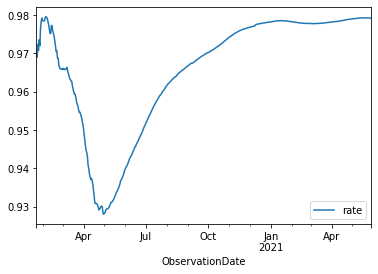

In [50]:
sr = df_cum.groupby(pd.Grouper(key="ObservationDate", freq = "1D"))[["rate"]].mean()
sr.plot()

(array([18283, 18353, 18444, 18536, 18628, 18718, 18776]),
 <a list of 7 Text major ticklabel objects>)

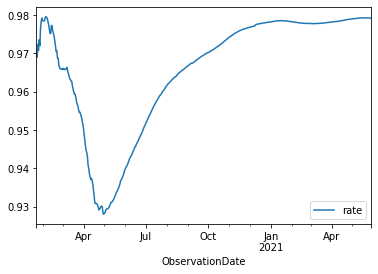

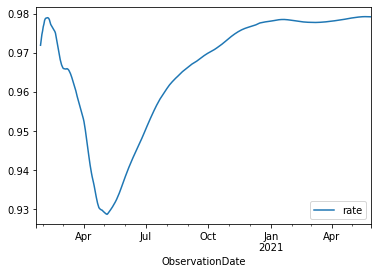

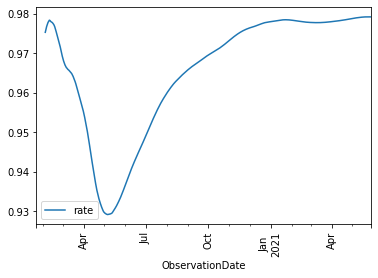

In [56]:
import matplotlib.pyplot as plt
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

plt.xticks(rotation = '90')


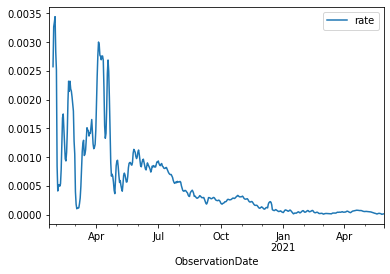

In [54]:
sr.rolling(window=7).std().plot()

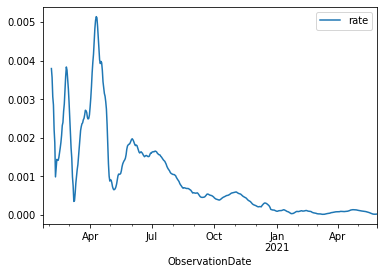

In [55]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.,
        737850., 737911.]), <a list of 9 Text major ticklabel objects>)

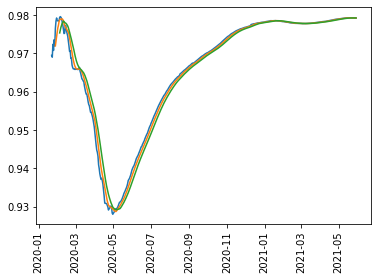

In [57]:
import matplotlib.pyplot as plt

plt.plot(sr)
plt.plot(sr.rolling(window = 7).mean())
plt.plot(sr.rolling(window = 14).mean())

plt.xticks(rotation = '90')